In [47]:
# https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/23_Time-Series-Prediction.ipynb
# https://www.tensorflow.org/tutorials/structured_data/time_series
# https://levelup.gitconnected.com/building-seq2seq-lstm-with-luong-attention-in-keras-for-time-series-forecasting-1ee00958decb
import keras
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import pandas as pd
# Important to noramlize the series
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [7]:
yahoo_tickers = pd.read_csv('generic.csv')
num_tickers = len(yahoo_tickers)

def random_ticker(exclude=None):
    #TODO: Adapt function to select a specific random subsample of the data
    return yahoo_tickers.loc[np.random.randint(num_tickers)]  
random_tickers = [yf.Ticker(random_ticker().Ticker) for _ in range(50)]
selected_tickers = [ticker for ticker in random_tickers if len(ticker.history(period="10y"))>1000]

- GN4D.SG: No data found for this date range, symbol may be delisted
- NBAXX: No data found for this date range, symbol may be delisted
- FNTEMX: No data found for this date range, symbol may be delisted
- FKORQX: No data found for this date range, symbol may be delisted


In [8]:
len(selected_tickers)

27

In [145]:
df = pd.read_csv('http://pastebin.com/raw/6xbjvEL0')

df.month = pd.to_datetime(df.month, unit='s')
df = df.set_index('month')

df = df.sort_index()

df['percentile'] = df.groupby(df.index)['ratio_cost'].rank(pct=True)
print(df['percentile'].head())

month
2010-08-01    0.2500
2010-08-01    0.6875
2010-08-01    0.6250
2010-08-01    0.9375
2010-08-01    0.7500
Name: percentile, dtype: float64


In [146]:
df.index

DatetimeIndex(['2010-08-01', '2010-08-01', '2010-08-01', '2010-08-01',
               '2010-08-01', '2010-08-01', '2010-08-01', '2010-08-01',
               '2010-08-01', '2010-08-01',
               ...
               '2015-10-01', '2015-10-01', '2015-10-01', '2015-10-01',
               '2015-10-01', '2015-10-01', '2015-10-01', '2015-10-01',
               '2015-10-01', '2015-10-01'],
              dtype='datetime64[ns]', name='month', length=1000, freq=None)

In [142]:
pd.Grouper(key=ticker.history(period="10y").index, freq="1W")

TimeGrouper(key=DatetimeIndex(['2011-03-29', '2011-03-30', '2011-03-31', '2011-04-01',
               '2011-04-04', '2011-04-05', '2011-04-06', '2011-04-07',
               '2011-04-08', '2011-04-11',
               ...
               '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19',
               '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-29'],
              dtype='datetime64[ns]', name='Date', length=2532, freq=None), freq=<Week: weekday=6>, axis=0, sort=True, closed='right', label='right', how='mean', convention='e', origin='start_day')

<AxesSubplot:title={'center':'Original series'}, xlabel='Date'>

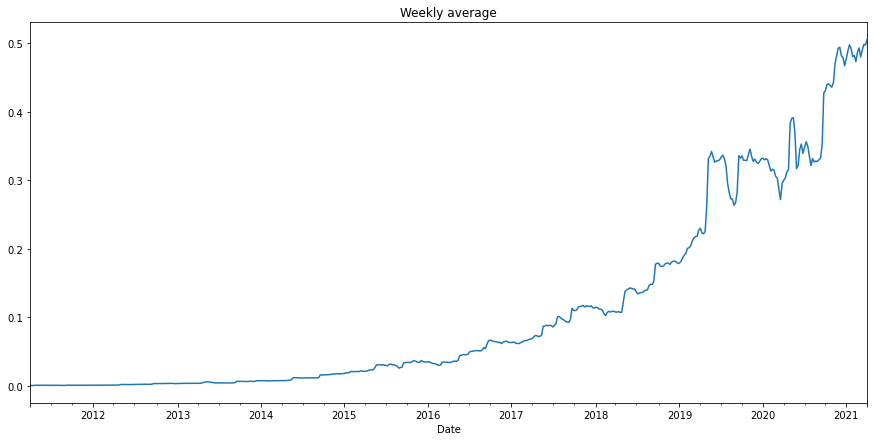

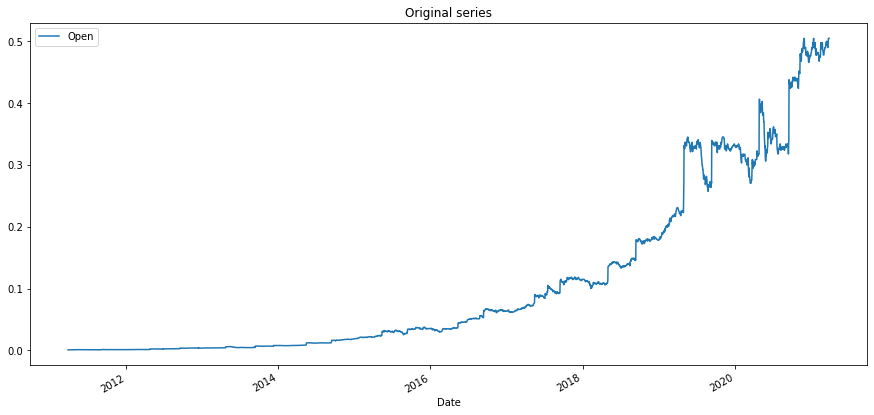

In [158]:
# Take the mean per weak and plot it
# Avialable frequencies are here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
ticker.history(period="10y").groupby(pd.Grouper(level='Date', freq="1W")).mean().Open.plot(figsize=(15,7), title='Weekly average')
ticker.history(period="10y").plot(y='Open', figsize=(15,7), title='Original series')

/Users/arnaujc/miniconda3/envs/finance/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/arnaujc/miniconda3/envs/finance/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/arnaujc/miniconda3/envs/finance/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/arnaujc/miniconda3/envs/finance/lib/pyt

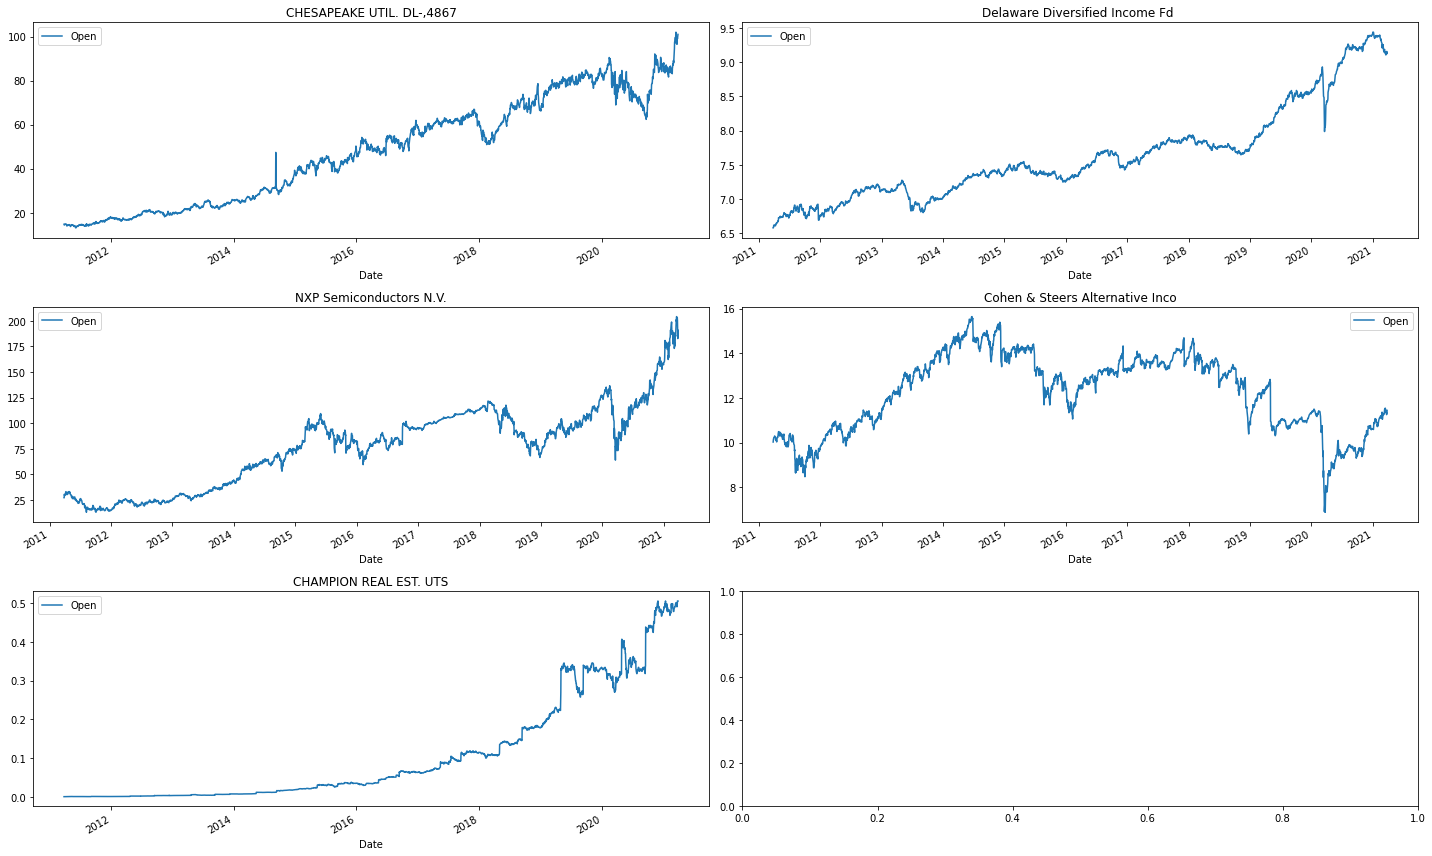

In [137]:
nrow, ncol = int(np.ceil(len(selected_tickers[:5])/2)), 2
fig, axes = plt.subplots(nrow, ncol,figsize=(int(10*ncol),int(4*nrow)))
axes = axes.reshape(-1)

for i, ticker in enumerate(selected_tickers[:5]):
    ticker.history(period="10y").plot(y = 'Open', ax=axes[i], title = ticker.info['shortName'])
    
plt.tight_layout()

In [113]:
ticker = selected_tickers[0]

In [140]:
ticker.history().index

DatetimeIndex(['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-08', '2021-03-09', '2021-03-10',
               '2021-03-11', '2021-03-12', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-22',
               '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
               '2021-03-29'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [103]:
train, test = train_test_split(ticker.history(period="10y").Open.to_numpy().reshape(-1,1), test_size = 0.3, shuffle=False)

In [112]:
selected_tickers[0].info['shortName']

'CHESAPEAKE UTIL. DL-,4867'

In [104]:
# Normalize the series
scaler = preprocessing.StandardScaler().fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

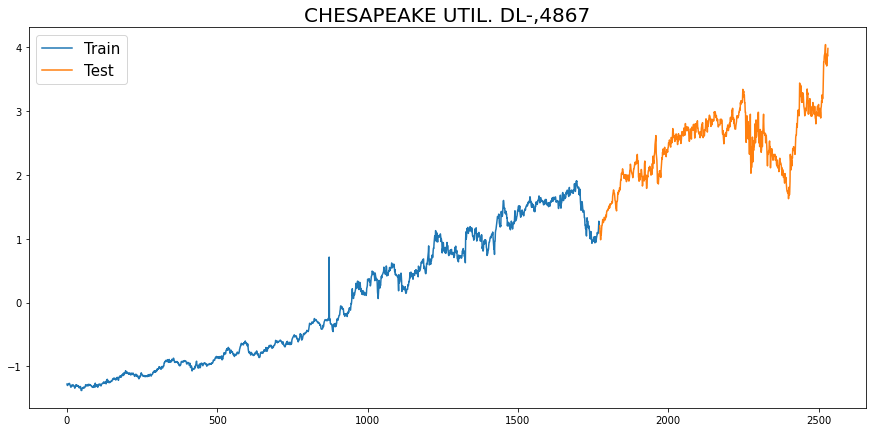

In [118]:
# Let's explore a little bit the data we have gotten.
plt.figure(figsize=(15,7))
plt.plot(np.array(range(len(train_scaled))) ,train_scaled[:,0])
plt.plot(np.array(range(len(train_scaled), len(train_scaled)+ len(test_scaled))), test_scaled[:,0])
plt.legend(['Train','Test'],fontsize=15)
plt.title(ticker.info['shortName'],fontsize=20)
plt.show()

<AxesSubplot:xlabel='Date'>

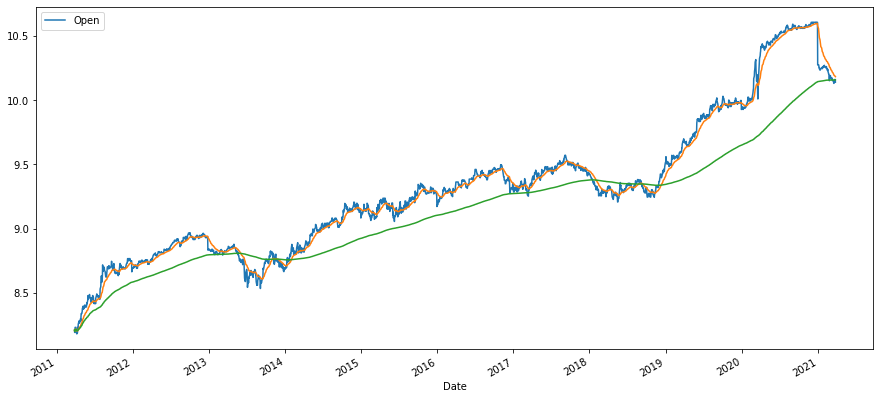

In [87]:
selected_tickers[6].history(period="10y").plot(y='Open', figsize=(15,7))
# Exponential weighted average, maybe this is better as it is much more smooth. On the other hand the noise can act as a regularizer against overfitting.
selected_tickers[6].history(period="10y").Open.ewm(span = 30).mean().plot()
selected_tickers[6].history(period="10y").Open.ewm(span = 360+180).mean().plot()

In [76]:
train.shape

(1761, 1)

In [70]:

def batch_generator():
    i=0
    while True:
        yield l[i]
        i+=1

        
gen = batch_generator()

In [53]:
tscv = TimeSeriesSplit(n_splits=30)
for train_index, test_index in tscv.split(selected_tickers[6].history(period="10y").Open):
    print("TRAIN:", train_index.shape, "TEST:", test_index.shape)

TRAIN: (87,) TEST: (81,)
TRAIN: (168,) TEST: (81,)
TRAIN: (249,) TEST: (81,)
TRAIN: (330,) TEST: (81,)
TRAIN: (411,) TEST: (81,)
TRAIN: (492,) TEST: (81,)
TRAIN: (573,) TEST: (81,)
TRAIN: (654,) TEST: (81,)
TRAIN: (735,) TEST: (81,)
TRAIN: (816,) TEST: (81,)
TRAIN: (897,) TEST: (81,)
TRAIN: (978,) TEST: (81,)
TRAIN: (1059,) TEST: (81,)
TRAIN: (1140,) TEST: (81,)
TRAIN: (1221,) TEST: (81,)
TRAIN: (1302,) TEST: (81,)
TRAIN: (1383,) TEST: (81,)
TRAIN: (1464,) TEST: (81,)
TRAIN: (1545,) TEST: (81,)
TRAIN: (1626,) TEST: (81,)
TRAIN: (1707,) TEST: (81,)
TRAIN: (1788,) TEST: (81,)
TRAIN: (1869,) TEST: (81,)
TRAIN: (1950,) TEST: (81,)
TRAIN: (2031,) TEST: (81,)
TRAIN: (2112,) TEST: (81,)
TRAIN: (2193,) TEST: (81,)
TRAIN: (2274,) TEST: (81,)
TRAIN: (2355,) TEST: (81,)
TRAIN: (2436,) TEST: (81,)
